# Brent Prices Forecast

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('BrentOilPrices.csv', index_col=0, parse_dates=True)
df.head()

,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


<AxesSubplot:xlabel='Date'>

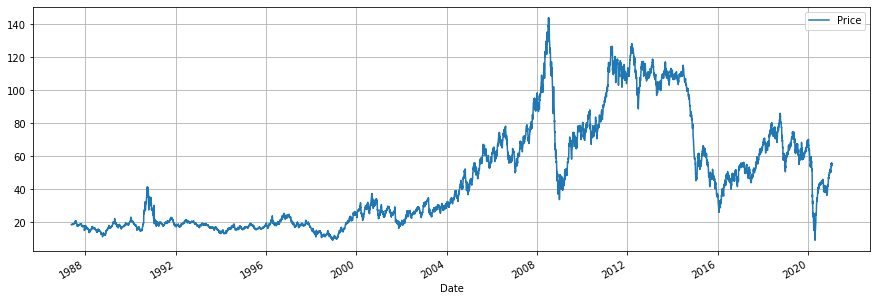

In [4]:
df.plot(figsize=(15,5), grid=True)

In [8]:
# Lets create a colomn for change in prices
df['d1'] = df['Price'] - df['Price'].shift(1)

<AxesSubplot:xlabel='Date'>

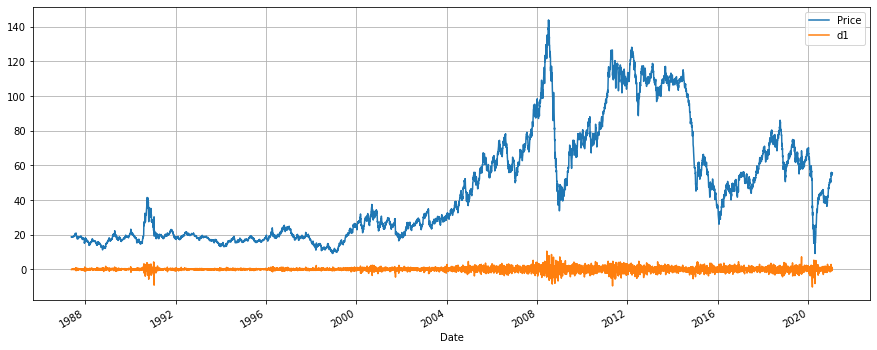

In [6]:
df.plot(figsize=(15,6),grid=True)

In [7]:
df.head()

,Price,d1
Date,,
1987-05-20,18.63,NaN
1987-05-21,18.45,-0.18
1987-05-22,18.55,0.10
1987-05-25,18.60,0.05
1987-05-26,18.63,0.03


<AxesSubplot:xlabel='Date'>

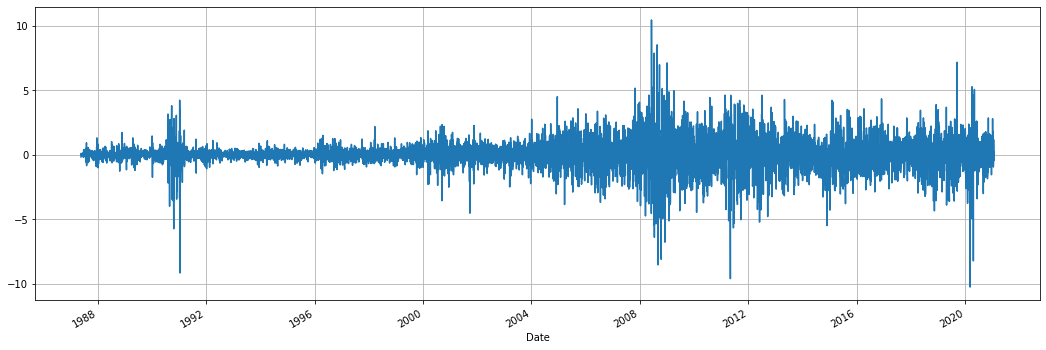

In [9]:
df['d1'].plot(figsize=(18,6), grid=True, label='First Difference')

In [10]:
df['Rolling Mean'] = df['Price'].rolling(window=30).mean()

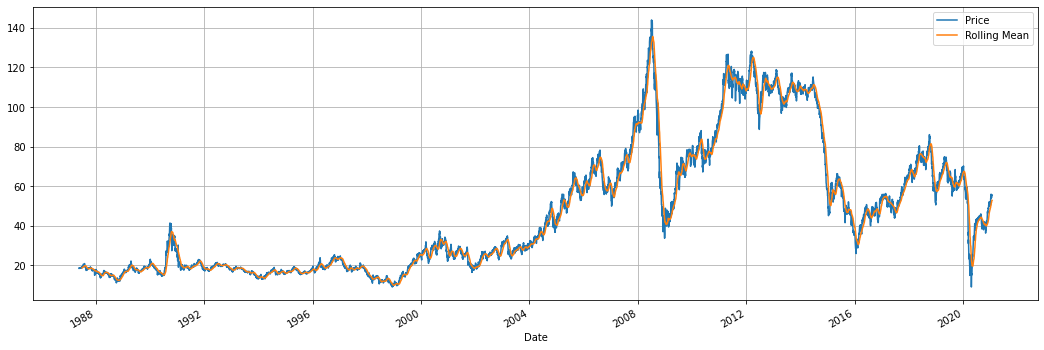

In [11]:
df[["Price","Rolling Mean"]].plot(figsize=(18,6))
plt.grid()

## ETS Decomposition

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [13]:
df.index

DatetimeIndex(['1987-05-20', '1987-05-21', '1987-05-22', '1987-05-25',
               '1987-05-26', '1987-05-27', '1987-05-28', '1987-05-29',
               '1987-06-01', '1987-06-02',
               ...
               '2021-01-12', '2021-01-13', '2021-01-14', '2021-01-15',
               '2021-01-18', '2021-01-19', '2021-01-20', '2021-01-21',
               '2021-01-22', '2021-01-25'],
              dtype='datetime64[ns]', name='Date', length=8554, freq=None)

In [14]:
result = seasonal_decompose(df['Price'], model='multiplicative', period=1)

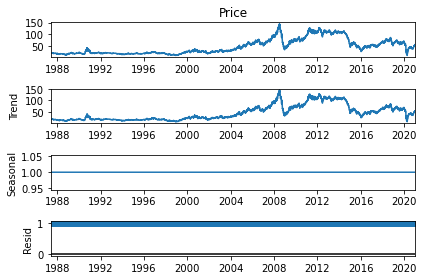

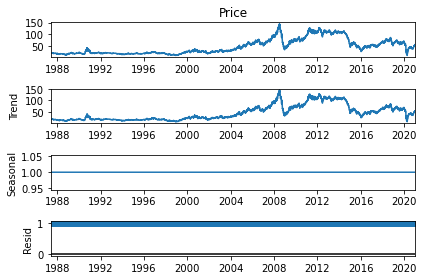

In [16]:
result.plot()

In [17]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [18]:
cycle,trend = hpfilter(df['Price'],lamb=1600)

In [19]:
df['trend'] = trend

In [22]:
df.head(5)

,Price,d1,Rolling Mean,trend
Date,,,,
1987-05-20,18.63,NaN,NaN,18.511323
1987-05-21,18.45,-0.18,NaN,18.526670
1987-05-22,18.55,0.10,NaN,18.542092
1987-05-25,18.60,0.05,NaN,18.557614
1987-05-26,18.63,0.03,NaN,18.573267


In [23]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [24]:
len(df)

8554

In [25]:
0.70*8554

5987.799999999999

In [65]:
train = df.iloc[:5900]
test = df.iloc[5900:]

#train = df[df.index.year<=2010]
#test = df[df.index.year>=2011]

In [66]:
train.tail()

,Price,d1,Rolling Mean,trend
Date,,,,
2010-07-30,77.50,-1.10,75.775000,78.334462
2010-08-02,81.93,4.43,75.937667,78.401209
2010-08-03,83.60,1.67,76.106667,78.422013
2010-08-04,83.76,0.16,76.296000,78.392073
2010-08-05,82.90,-0.86,76.552000,78.309825


In [67]:
test.head()

,Price,d1,Rolling Mean,trend
Date,,,,
2010-08-06,81.28,-1.62,76.755667,78.177059
2010-08-09,81.54,0.26,76.933333,77.998434
2010-08-10,79.89,-1.65,77.041000,77.780549
2010-08-11,77.83,-2.06,77.161667,77.532216
2010-08-12,76.63,-1.20,77.218000,77.263565


In [68]:
fitted_model = ExponentialSmoothing(train['Price'],trend='mul', seasonal='mul',seasonal_periods=12).fit()

C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [69]:
test_predictions = fitted_model.forecast(36).rename('HW Forecast')

C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


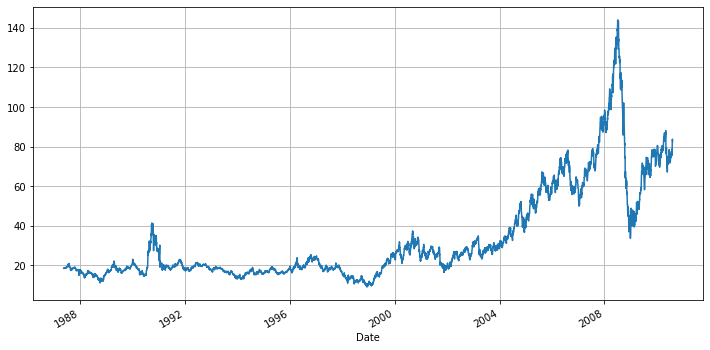

In [79]:
train['Price'].plot(figsize=(12,6))
plt.grid()

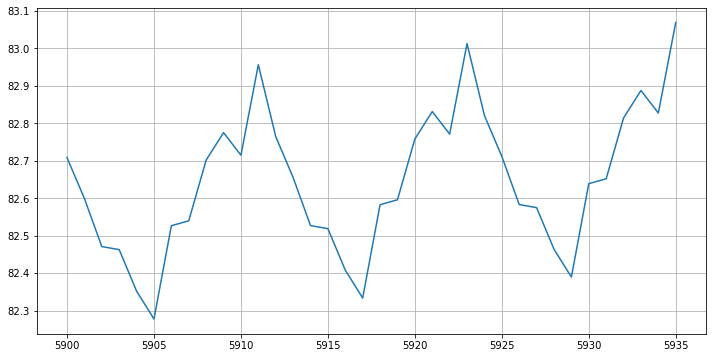

In [71]:
test_predictions.plot(figsize=(12,6))
plt.grid()

In [75]:
test_predictions.values

array([82.70836047, 82.59934946, 82.47099418, 82.46278448, 82.35205368,
       82.27772236, 82.52666496, 82.53973682, 82.70181886, 82.77503549,
       82.71483082, 82.95632231, 82.76455249, 82.65546742, 82.52702493,
       82.51880965, 82.40800362, 82.3336218 , 82.58273353, 82.59581427,
       82.75800643, 82.8312728 , 82.77102723, 83.01268279, 82.82078268,
       82.7116235 , 82.58309374, 82.57487288, 82.46399157, 82.38955922,
       82.63884019, 82.65192982, 82.81423217, 82.88754832, 82.82726182,
       83.06908156])